In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path = '/home/kim/Desktop/AI_cours/data/puppy.jpg'

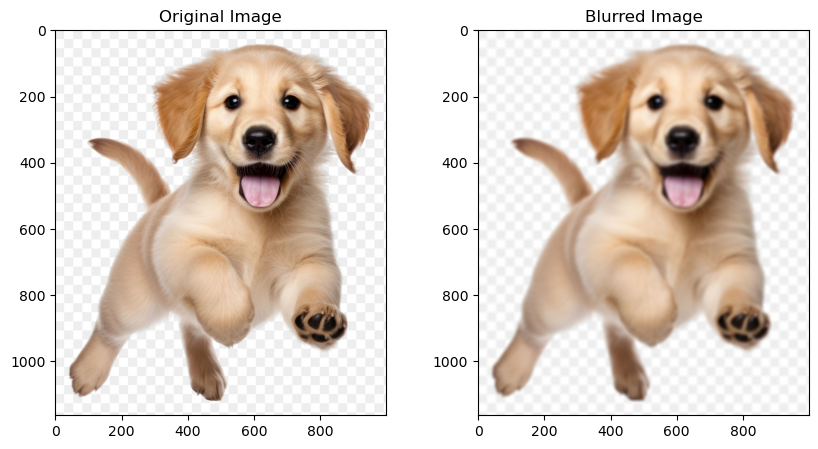

In [6]:
image = cv2.imread(path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

dst = cv2.blur(image_rgb, (11,11))
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_title('Original Image')
axes[0].imshow(image_rgb)
axes[1].set_title('Blurred Image')
axes[1].imshow(dst)
plt.show()

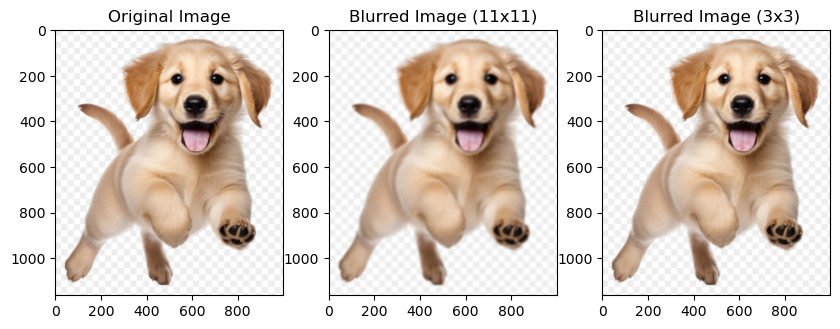

In [7]:
dst2 = cv2.blur(image_rgb, (3,3))

fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[1].imshow(dst)
axes[1].set_title('Blurred Image (11x11)')
axes[2].imshow(dst2)
axes[2].set_title('Blurred Image (3x3)')
plt.show()

커널크기에 따라 blur 효과가 달라짐
- 3*3 커널 : 약간 흐림
- 5*5 커널: 중간적 흐림
- 11*11 커널 : 많이 흐림


왜 이런 일이?
- 작은 커널(3*3) : 주변에 9개 픽셀의 평균
  - 가까운 픽셀만 영향을 받음


- 큰 커널(11*11) : 주변에 121개 픽셀의 평균
  - 멀리 있는 픽셀도 영향을 받음


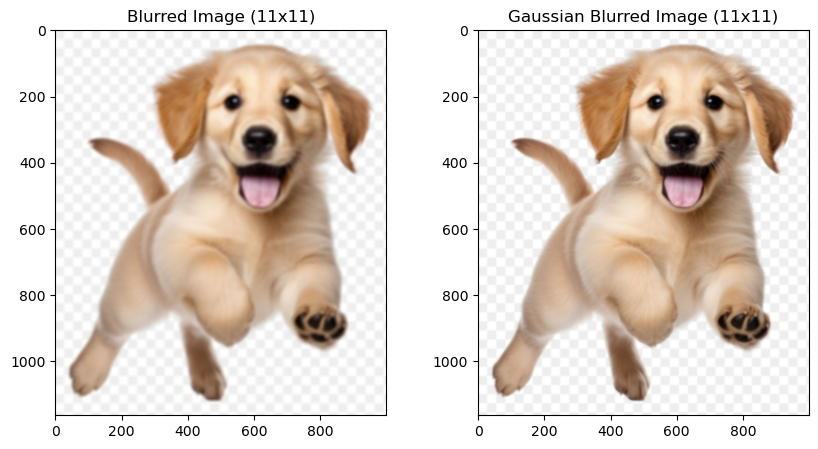

In [ ]:
# GaussianBlur(이미지, (커널크기), 표준편차)


fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].imshow(dst)
axes[0].set_title('Blurred Image (11x11)')
axes[1].imshow(cv2.GaussianBlur(image_rgb, (11,11), 0)) # 표준편차 0은 커널크기에 맞게 자동설정
axes[1].set_title('Gaussian Blurred Image (11x11)')
plt.show()

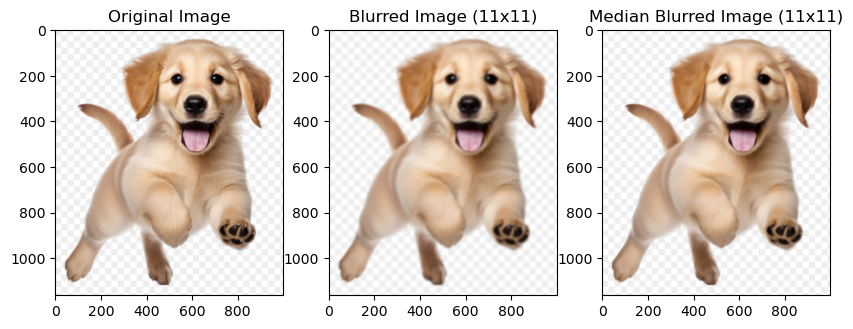

In [ ]:
# median 중위수(중앙값) 사용
dst3 = cv2.medianBlur(image_rgb, 11) # 11x11 커널크기

fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[1].imshow(dst)
axes[1].set_title('Blurred Image (11x11)')
axes[2].imshow(dst3)
axes[2].set_title('Median Blurred Image (11x11)')
plt.show()

침식(erosion), 팽창(dilate), 열기(opening), 닫기(closing)

In [10]:
path = '/home/kim/Desktop/AI_cours/data/salt.jpg'

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

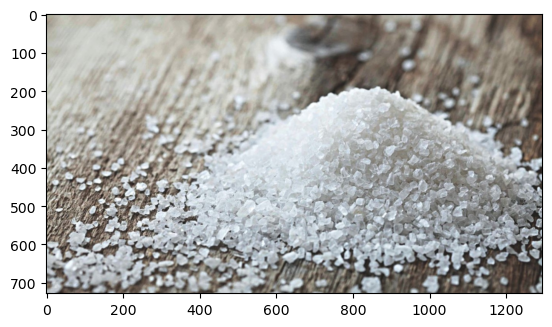

In [23]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

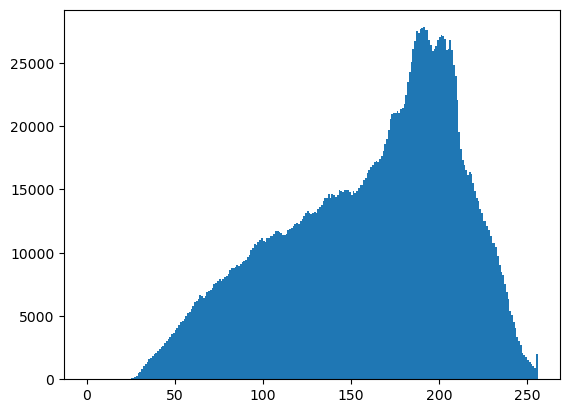

In [24]:
plt.hist(image.ravel(), bins=256, range=(0,256))
plt.show()

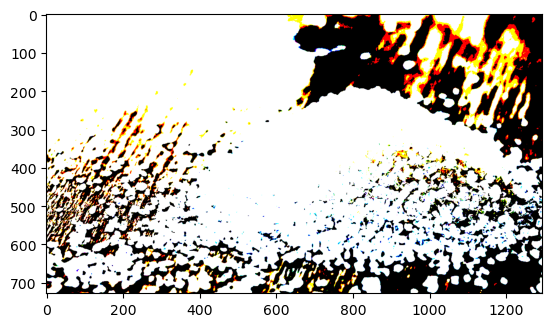

In [ ]:
# 이진화 : 임계값을 기준으로 255, 0으로 나누는 작업
result, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) # cv2.THRESH_BINARY_INV : 반전
# 임계값을 넘기면 255로 변경
plt.imshow(binary_image) # 빨강, 초록, 파랑 3채널 각각 255,0으로 나뉨(즉, 흰색 검정 이외에 빨강, 초록, 파랑도 나옴)

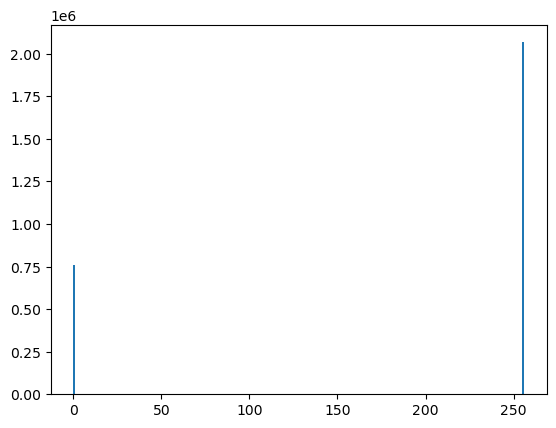

In [28]:
plt.hist(binary_image.ravel(), bins=256, range=(0,256))
plt.show()

In [29]:
binary_image.shape

(728, 1295, 3)

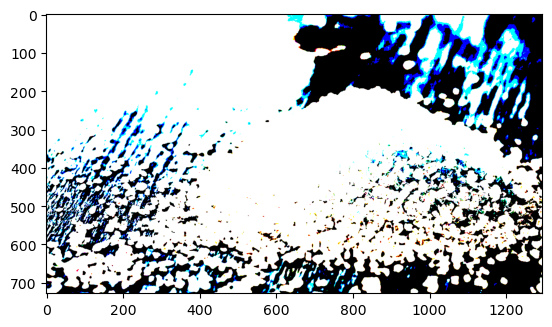

In [30]:
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))

In [36]:
kernel = np.ones((11,11), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

팽창과 침식 적용
- erosion 침식
  - 흰색 영역(255)의 외곽을 깍아내는 연산
  - 커널이 완전히 흰색을 포함하는 영역만 유지, 나머지는 검정(0)으로 바꿔요
  - 객체가 작아져요(외곽이 깍였으니깐), 작은 노이즈 제거(작은 점 형태 흰색 잡음 제거)


- dialtion 확대(팽창)
  - 흰색 영역(255) 넓혀줘요
  - 커널이 1개 라도 흰색 만나면 중심 픽셀을 흰색으로 확장
  - 객체가 커져요(빈 공간 채워줘요), 끊긴 선 연결(문자, 윤곽선 연결), 구멍 채워줘요

실무 TIP)

1. Binary(0~255)
2. erosion(줄어들고 잡음 제거) 또는 dailtion(커짐, 끊김 영역 연결)

- 일반적으로 외부 노이즈가 문제면, opening 사용
- 내부 구멍이 문제면 closing 사용
- 둘 다 문제면 opening 사용 후 closing

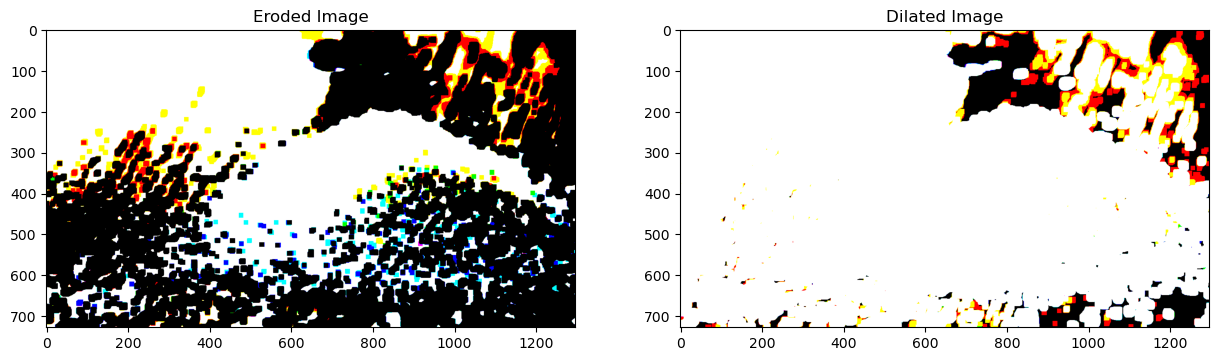

In [37]:
erode_image = cv2.erode(binary_image, kernel, iterations=1)
dilate_image = cv2.dilate(binary_image, kernel, iterations=1)

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].imshow(erode_image)
axes[0].set_title('Eroded Image')
axes[1].imshow(dilate_image)
axes[1].set_title('Dilated Image')
plt.show()

- opening = erosio >> dilation (점 noise 빼고, 구멍 채워)
 - nosie 제거한 후, 모형 유지
- closing = dilation >> erosion
 - 끊긴 윤관선 연결, 구멍 채움

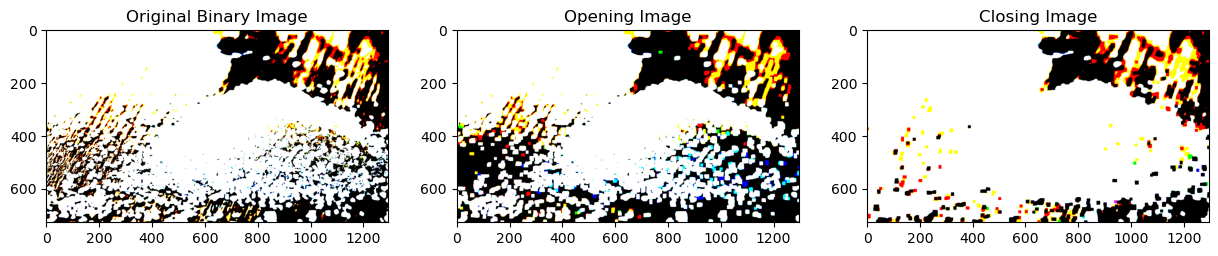

In [35]:
result, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((11,11), dtype=np.uint8)

opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].imshow(binary_image)
axes[0].set_title('Original Binary Image')
axes[1].imshow(opening)
axes[1].set_title('Opening Image')
axes[2].imshow(closing)
axes[2].set_title('Closing Image')
plt.show()